In [1]:
#1 ライブラリのインポート等
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import model_from_json
#from keras.models import load_model #model = load_model('cnn_model_weight.h5') #model.save('cnn_model_weight.h5') で保存したファイルを読み込む場合に使用


2023-01-11 10:13:58.364327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#2 各種設定
recognise_image = '/home/user/ダウンロード/iori_正面.JPG' #ここを変更。画像認識したい画像ファイル名。（実行前に認識したい画像ファイルを1つアップロードしてください）
folder = ['正面', 'その他']  #ここを変更。今回は日本語の表示にしたかったので、folder = ['circle', 'cross'] の順番で日本語にしています。
image_size = 200 # ここを変更。「28」を指定した場合、縦28横28ピクセルの画像に変換
                # 「② 用意した自前画像で学習」と同じにする。
color_setting = 1  # ここを変更。画像認識する画像のカラー。「1」はモノクロ・グレースケール。「3」はカラー
                   # 「② 用意した自前画像で学習」と同じにする。


In [3]:
#3 各種読み込み
model = model_from_json(open('cnn_model.json', 'r').read())
model.load_weights('cnn_weights.h5')
#model = load_model('cnn_model_weight.h5') #model.save('cnn_model_weight.h5') で保存したファイルを読み込む場合に使用


2023-01-11 10:14:39.501566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 10:14:39.610242: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


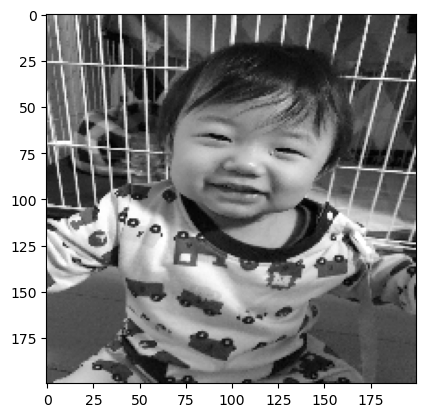

In [4]:
#4 画像の表示・各種設定等
img = cv2.imread(recognise_image, 0)  #ここを変更。モノクロ・グレースケールの場合は「0」。カラーの場合は「1」 。         
img = cv2.resize(img, (image_size, image_size))
plt.imshow(img)
plt.gray()  #ここを変更。カラーの場合は「plt.gray()」を消す。モノクロ・グレースケールの場合は「plt.gray()」が無いと変な色になります。
plt.show()
img.shape
img = img.reshape(200, 200, 1).astype('float32')/255 


In [5]:
#5 予測と結果の表示等
prediction = model.predict(np.array([img]), batch_size=2, verbose=1)
result = prediction[0]


1/1 [==============================] - 2s 2s/step


In [6]:
for i, accuracy in enumerate(result):
  print('画像認識AIは「', folder[i], '」の確率を', int(accuracy * 100), '% と予測しました。')


画像認識AIは「 正面 」の確率を 0 % と予測しました。
画像認識AIは「 その他 」の確率を 99 % と予測しました。


In [13]:
print('-------------------------------------------------------')
print('画像認識AI：○ or × の予測結果は、「', folder[result.argmax()],'」です。')

-------------------------------------------------------
画像認識AI：○ or × の予測結果は、「 その他 」です。
